In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import os,cmocean
import scipy.io as sio
from scipy import interpolate
from pyproj import Proj,transform
from bathy_common import *
from matplotlib import path

In [7]:
cascadiafile = '/home/ssahu/saurav/NEMO_run/bathy_casacadia/cascadia.bil'
def getcascadia(filename):
    # Adapted from: https://pymorton.wordpress.com/2016/02/26/plotting-prism-bil-arrays-without-using-gdal/
    def read_prism_hdr(hdr_path):
        """Read an ESRI BIL HDR file"""
        with open(hdr_path, 'r') as input_f:
            header_list = input_f.readlines()
        return dict(item.strip().split() for item in header_list)
    def read_prism_bil(bil_path):
        """Read an array from ESRI BIL raster file"""
        hdr_dict = read_prism_hdr(bil_path.replace('.bil', '.hdr'))
        data = np.fromfile(bil_path, dtype=np.int16).byteswap()
        data = data.reshape(int(hdr_dict['NROWS']), int(hdr_dict['NCOLS']))
        return data
    z = np.flipud(read_prism_bil(filename))    # load data
    mask = (z == 0) | (z >= 10000)             # mask for nonexistant points and land points
    z -= 10000                                 # remove offset
    z *= -1                                    # make depths positive
    z[mask] = 0                                # set masked values to zero
    zm = ma.masked_array(z, mask=mask)
    # Construct Cascadia coordinates
    xmin, xmax, dx = -738044.062, 749705.938, 250
    ymin, ymax, dy = 101590.289, 1710340.289, 250
    x=xmin + dx*np.arange(0, z.shape[1]) + dx/2
    y=ymin + dy*np.arange(0, z.shape[0]) + dy/2
    p = Proj(r'+proj=lcc +lat_1=41.5 +lat_2=50.5 +lat_0=38 +lon_0=-124.5 +x_0=0 +y_0=0 +ellps=clrk66 +no_defs')
    return x,y,z,p

<IPython.core.display.Javascript object>


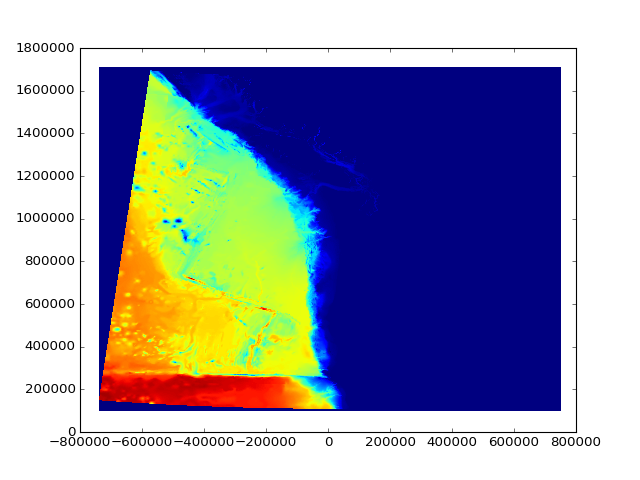

In [8]:
    x,y,z,p = getcascadia(cascadiafile)
plt.figure()
plt.pcolormesh(x,y,z)
